In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [9]:
#import Lib. for visualization
import seaborn as sns
import matplotlib as plt

In [3]:
hp=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
# To get an overview of the project
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#From the info we can find the presence of null values 
#use Heatmap for easy visualization of the data 
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

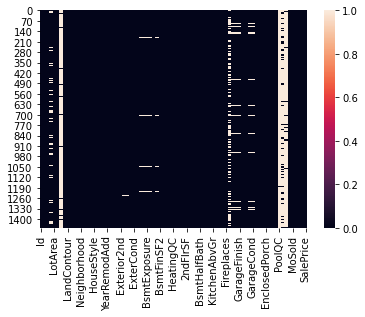

In [10]:
sns.heatmap(hp[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']].isnull())

In [ ]:
#from the heat map it can be seen that there are few columns that have a lot of dtata missing and few other columns with less null values 
#We drops colums with a lot of missing values 

hp.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature','LotFrontage'],axis =1, inplace=True)

In [ ]:
#Columns wiith comparitively less no. of missing data are filled with the mode of the corresponding column

hp['MasVnrType']=hp['MasVnrType'].fillna(hp['MasVnrType'].mode()[0])
hp['MasVnrArea']=hp['MasVnrArea'].fillna(hp['MasVnrArea'].mode()[0])
hp['BsmtQual']=hp['BsmtQual'].fillna(hp['BsmtQual'].mode()[0])
hp['BsmtCond']=hp['BsmtCond'].fillna(hp['BsmtCond'].mode()[0])
hp['BsmtExposure']=hp['BsmtExposure'].fillna(hp['BsmtExposure'].mode()[0])
hp['BsmtFinType1']=hp['BsmtFinType1'].fillna(hp['BsmtFinType1'].mode()[0])
hp['BsmtFinType2']=hp['BsmtFinType2'].fillna(hp['BsmtFinType2'].mode()[0])
hp['GarageType']=hp['GarageType'].fillna(hp['GarageType'].mode()[0])
hp['GarageYrBlt']=hp['GarageYrBlt'].fillna(hp['GarageYrBlt'].mode()[0])
hp['GarageFinish']=hp['GarageFinish'].fillna(hp['GarageFinish'].mode()[0])
hp['GarageQual']=hp['GarageQual'].fillna(hp['GarageQual'].mode()[0])
hp['GarageCond']=hp['GarageCond'].fillna(hp['GarageCond'].mode()[0])
hp['Electrical']=hp['Electrical'].fillna(hp['Electrical'].mode()[0])

In [ ]:
#Seperate the dependend variable 

Y=hp['SalePrice']
hp.drop(['SalePrice'],axis =1, inplace=True)

In [ ]:
#OneHotEncoder. 
#Encode categorical integer features using a one-hot aka one-of-K scheme. 
#The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete)
#features. The output will be a sparse matrix where each column corresponds to one possible value of one feature.

In [ ]:
#Identify no numaric values column, in non numaric values seperate columes on which OneHotEncoder can be applied

from sklearn.preprocessing import OneHotEncoder
ohe   = OneHotEncoder(sparse=False)
ohed=ohe.fit_transform(hp[['MSZoning', 'Street','Neighborhood','Condition1','Condition2','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating','CentralAir', 'Functional','GarageType',
       'PavedDrive','SaleType', 'SaleCondition']])

In [ ]:
# list out the remaining column

list(set(hp.columns) - set(hp._get_numeric_data().columns)-set(['MSZoning', 'Street','Neighborhood','Condition1','Condition2','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating','CentralAir', 'Functional','GarageType',
       'PavedDrive','SaleType', 'SaleCondition']))

In [ ]:
#OrdinalEncoder
#The input to this transformer should be an array-like of integers or strings, 
#denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. 
#This results in a single column of integers (0 to n_categories - 1) per feature.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
encd=hp[['HouseStyle', 'BldgType', 'Utilities', 'LandSlope','LotConfig','LandContour', 'GarageCond', 
 'LotShape',]] = enc.fit_transform(hp[['HouseStyle', 'BldgType', 'Utilities', 'LandSlope','LotConfig','LandContour', 'GarageCond', 
 'LotShape',]])

# Seperate colums for which the order of values can be defined 

enc1=OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
['NA','No', 'Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],
['Mix','FuseP','FuseF','FuseA','SBrkr'],['Po','Fa','TA','Gd','Ex'],['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex']])
encd1=enc1.fit_transform(hp[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual']])


In [ ]:
#Create the final dataframe X train with cleaned up data 

finaltrain=np.concatenate([encd,encd1,ohed,hp._get_numeric_data()], axis=1)
finaltrainxt=pd.DataFrame(finaltrain)
X=finaltrainxt

In [ ]:
#Use Standard scaler to standardize the values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_X = scaler.fit_transform(X)

In [ ]:
#Test Train split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( scaled_data_X, Y, test_size=0.20, random_state=1)

In [ ]:
#Linear regression is a linear approach to modelling the relationship between a scalar response and one or more
#explanatory variables (also known as dependent and independent variables).

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print('Train set mse:', mean_squared_error(y_train, regressor.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, regressor.predict(x_test)))
print('Test set score:', regressor.score(x_train,y_train))

In [ ]:
#Random Forest is a classifier that contains a number of decision trees on various subsets of the 
#given dataset and takes the average to improve the predictive accuracy of that dataset.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(x_train,y_train)

print('Train set mse:', mean_squared_error(y_train, RFR.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, RFR.predict(x_test)))
print('Test set score:', RFR.score(x_train,y_train))

In [ ]:
#Compared to the leaner regression RandomForestRegressor model tends to give better predictions

In [ ]:
#Perform similer operations on the test data for cleanup  
#Make sure the data is clean after repeating the same operations for train data
#In some cases like this we need to do additional cleanup in few colums to make the data ready for the model to predict

In [ ]:
test_hp=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

test_hp.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature','LotFrontage'],axis =1, inplace=True)

test_hp['MasVnrType']=test_hp['MasVnrType'].fillna(test_hp['MasVnrType'].mode()[0])
test_hp['MasVnrArea']=test_hp['MasVnrArea'].fillna(test_hp['MasVnrArea'].mode()[0])
test_hp['BsmtQual']=test_hp['BsmtQual'].fillna(test_hp['BsmtQual'].mode()[0])
test_hp['BsmtCond']=test_hp['BsmtCond'].fillna(test_hp['BsmtCond'].mode()[0])
test_hp['BsmtExposure']=test_hp['BsmtExposure'].fillna(test_hp['BsmtExposure'].mode()[0])
test_hp['BsmtFinType1']=test_hp['BsmtFinType1'].fillna(test_hp['BsmtFinType1'].mode()[0])
test_hp['BsmtFinType2']=test_hp['BsmtFinType2'].fillna(test_hp['BsmtFinType2'].mode()[0])
test_hp['GarageType']=test_hp['GarageType'].fillna(test_hp['GarageType'].mode()[0])
test_hp['GarageYrBlt']=test_hp['GarageYrBlt'].fillna(test_hp['GarageYrBlt'].mode()[0])
test_hp['GarageFinish']=test_hp['GarageFinish'].fillna(test_hp['GarageFinish'].mode()[0])
test_hp['GarageQual']=test_hp['GarageQual'].fillna(test_hp['GarageQual'].mode()[0])
test_hp['GarageCond']=test_hp['GarageCond'].fillna(test_hp['GarageCond'].mode()[0])
test_hp['Electrical']=test_hp['Electrical'].fillna(test_hp['Electrical'].mode()[0])
test_hp['MSZoning']=test_hp['MSZoning'].fillna(test_hp['MSZoning'].mode()[0])
test_hp['Exterior1st']=test_hp['Exterior1st'].fillna(test_hp['Exterior1st'].mode()[0])
test_hp['Exterior2nd']=test_hp['Exterior2nd'].fillna(test_hp['Exterior2nd'].mode()[0])
test_hp['Functional']=test_hp['Functional'].fillna(test_hp['Functional'].mode()[0])
test_hp['SaleType']=test_hp['SaleType'].fillna(test_hp['SaleType'].mode()[0])
test_hp['Utilities']=test_hp['Utilities'].fillna(test_hp['Utilities'].mode()[0])
test_hp['KitchenQual']=test_hp['KitchenQual'].fillna(test_hp['KitchenQual'].mode()[0])

In [ ]:
test_hp.columns

In [ ]:
sns.heatmap(hp[['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].isnull())

In [ ]:
test_hp[['BsmtCond', 'HouseStyle', 'BldgType', 'Utilities', 'BsmtQual', 'LandSlope', 'LotConfig', 'ExterQual',
 'BsmtExposure', 'HeatingQC', 'GarageQual', 'KitchenQual', 'GarageFinish', 'LandContour', 'GarageCond', 'BsmtFinType1',
 'LotShape', 'Electrical', 'BsmtFinType2', 'ExterCond']].isnull().sum()

In [ ]:
tohed=ohe.transform(test_hp[['MSZoning', 'Street','Neighborhood','Condition1','Condition2','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating','CentralAir', 'Functional','GarageType',
       'PavedDrive','SaleType', 'SaleCondition']])

In [ ]:
tencd1=enc1.transform(test_hp[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual']])


In [ ]:
tencd=test_hp[['HouseStyle', 'BldgType', 'Utilities', 'LandSlope','LotConfig','LandContour', 'GarageCond', 
 'LotShape',]] = enc.transform(test_hp[['HouseStyle', 'BldgType', 'Utilities', 'LandSlope','LotConfig','LandContour', 'GarageCond', 
 'LotShape',]])

In [ ]:
test_hp._get_numeric_data().columns

In [ ]:
test_hp[[ 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']].isnull().sum()

In [ ]:
#Additional cleanup 

test_hp['BsmtFinSF1']=test_hp['BsmtFinSF1'].fillna(test_hp['BsmtFinSF1'].mean())
test_hp['BsmtFinSF2']=test_hp['BsmtFinSF2'].fillna(test_hp['BsmtFinSF2'].mean())
test_hp['BsmtUnfSF']=test_hp['BsmtUnfSF'].fillna(test_hp['BsmtUnfSF'].mean())
test_hp['TotalBsmtSF']=test_hp['TotalBsmtSF'].fillna(test_hp['TotalBsmtSF'].mean())
test_hp['BsmtFullBath']=test_hp['BsmtFullBath'].fillna(test_hp['BsmtFullBath'].mean())
test_hp['BsmtHalfBath']=test_hp['BsmtHalfBath'].fillna(test_hp['BsmtHalfBath'].mean())
test_hp['GarageCars']=test_hp['GarageCars'].fillna(test_hp['GarageCars'].mode()[0])
test_hp['GarageArea']=test_hp['GarageArea'].fillna(test_hp['GarageArea'].mean())

In [ ]:
finalTest=np.concatenate([tencd,tencd1, tohed,test_hp._get_numeric_data()], axis=1)
XT=pd.DataFrame(finalTest)

In [ ]:
scaled_data_XT = scaler.transform(XT)

In [ ]:
YT=RFR.predict(scaled_data_XT)

In [ ]:
final=pd.DataFrame(YT)

In [ ]:
output = pd.DataFrame({'Id': test_hp.Id, 'SalePrice': YT})
output.to_csv('my_submission_hp_m.csv', index=False)